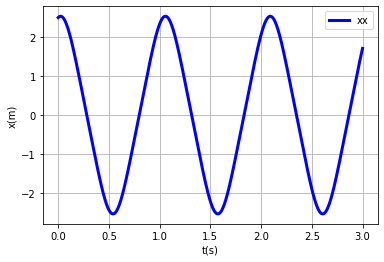

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃
┃           Ex 4-c            ┃
┃                             ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃  - |af0| >                  ┃
┃     - n=1: 2.4087           ┃
┃     - n=3: 0.0893           ┃
┃     - n=5: 0.0028           ┃
┃                             ┃
┃  - |bf0| >                  ┃
┃     - n=1: 0.3469           ┃
┃     - n=3: 0.0409           ┃
┃     - n=5: 0.0025           ┃
┃                             ┃
┃  - sqrt(af1**2 + bf1**2) >  ┃
┃     - n=1: 2.4335           ┃
┃     - n=3: 0.0982           ┃
┃     - n=5: 0.0038           ┃
┃                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


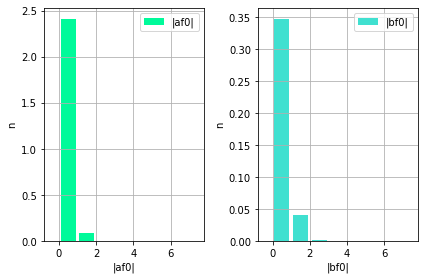

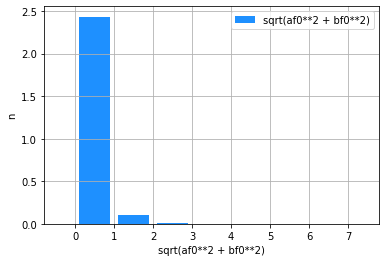

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def abfourier(tp,xp,it0,it1,nf):
#
# cálculo dos coeficientes de Fourier a_nf e b_nf
#       a_nf = 2/T integral ( xp cos( nf w) ) dt   entre tp(it0) e tp(it1)
#       b_nf = 2/T integral ( xp sin( nf w) ) dt   entre tp(it0) e tp(it1)    
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp   (abcissas)
#                 posição xp (ordenadas) 
#       indices inicial it0
#               final   it1  (ao fim de um período)   
#       nf índice de Fourier
# output: af_bf e bf_nf  
# @author: vitor.torres

    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per

    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return af,bf



# Arrays precisos
# array com 1000 zeros
ind = np.transpose([0 for i in range(1000)])
countMax = 0
ampl = 0
af0 = np.empty(15)
bf0 = np.empty(15)


# Tempo inicial e final
ti = 0
tf = 3

# Massa
m = 0.5
k = 1.8
alpha = 0.9
xxEqui = 0

# Posição inicial
xx0 = 2.5

# Velocidade inicial
vx0 = 3

# Aceleração inicial
ax0 = 0

# dt incremento do tempo e n numero de intervalos
dt = 0.0005
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
Emec = np.empty(n + 1)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0
ax[0] = ax0

# Soma das amplitudes máximas sao máximas (x[i-1] < x[i] > x[i-1])
amps = 0
# Array de tempos (o seu tamanho é o número de amplitudes máximas encontradas (para fazer a média))
nAmps = []

periodoArray = []

# Preencher os vetores x, v, a
for i in range(n):    
    ax[i] = (-k * xx[i]  - 4 * alpha * xx[i]**3) / m
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i + 1] * dt
    
    
    # Somar as amplitudes médias encontradas e incrementar o número destas encontradas
    #                                                 t > 200s para ser regime estacionário (mais ou menos)
    if (xx[i - 1] < xx[i]) and (xx[i] > xx[i + 1]):
        amps += xx[i]
        nAmps.append(t[i])
        countMax = countMax + 1 # num de maximos
        ind[countMax] = int(i)  # guardar os "i" de picos (numerados com countMax) (ex: pico[1] == 0.123...)
        
t0 = ind[countMax - 1]
t1 = ind[countMax]
for i in range(15):
    af, bf = abfourier(t, xx, t0, t1, i)
    af0[i] = af
    bf0[i] = bf
    

plt.plot(t, xx, label="xx",  linestyle='-', linewidth=3, color="blue")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()
    

print("┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓")
print("┃                             ┃")
print("┃           Ex 4-c            ┃")
print("┃                             ┃")
print("┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫")
print("┃  - |af0| >                  ┃")
print("┃     - n=1: %-8s         ┃" % np.round(af0[1], 4))
print("┃     - n=3: %-8s         ┃" % np.round(af0[3], 4))
print("┃     - n=5: %-8s         ┃" % np.round(af0[5], 4))
print("┃                             ┃")
print("┃  - |bf0| >                  ┃")
print("┃     - n=1: %-8s         ┃" % np.round(bf0[1], 4))
print("┃     - n=3: %-8s         ┃" % np.round(bf0[3], 4))
print("┃     - n=5: %-8s         ┃" % np.round(bf0[5], 4))
print("┃                             ┃")
print("┃  - sqrt(af1**2 + bf1**2) >  ┃")
print("┃     - n=1: %-8s         ┃" % np.round(np.sqrt(af0[1]**2 + bf0[1]**2), 4))
print("┃     - n=3: %-8s         ┃" % np.round(np.sqrt(af0[3]**2 + bf0[3]**2), 4))
print("┃     - n=5: %-8s         ┃" % np.round(np.sqrt(af0[5]**2 + bf0[5]**2), 4))
print("┃                             ┃")
print("┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛")



ii = np.linspace(0, 7, 15)
# Plot
plt.subplot(1, 2, 1)
plt.bar(ii, np.abs(af0), label="|af0|",  linestyle='-', linewidth=3, color="mediumspringgreen")
plt.xlabel("|af0|")
plt.ylabel("n")
plt.legend()         # Legenda só aparece com isto
plt.grid()

plt.subplot(1, 2, 2)
plt.bar(ii, np.abs(bf0), label="|bf0|",  linestyle='-', linewidth=3, color="turquoise")
plt.xlabel("|bf0|")
plt.ylabel("n")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.tight_layout()
plt.show()

plt.bar(ii, np.sqrt(af0**2 + bf0**2), label="sqrt(af0**2 + bf0**2)",  linestyle='-', linewidth=3, color="dodgerblue")
plt.xlabel("sqrt(af0**2 + bf0**2)")
plt.ylabel("n")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()

    
    